In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
df = pd.read_excel('important.xlsx')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df

,Parking,Restaurant,Fitness Centre,Spa & Wellness Centre,Business Centre,Airport Shuttle,Highspeed Internet,Airconditioning,Non-smoking Rooms,Safe/Vault,...,Swimming Pool,Valet Parking,Kids Activities,Tennis Court,Bar/Lounge,Babysitting/Child Services,Game Room,Golfcourse,Casino,Beach Access
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1641,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
1642,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1643,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
df.shape

(1645, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Parking                     1280 non-null   float64
 1   Restaurant                  621 non-null    float64
 2   Fitness Centre              578 non-null    float64
 3   Spa & Wellness Centre       387 non-null    float64
 4   Business Centre             530 non-null    float64
 5   Airport Shuttle             377 non-null    float64
 6   Highspeed Internet          1246 non-null   float64
 7   Airconditioning             1236 non-null   float64
 8   Non-smoking Rooms           1140 non-null   float64
 9   Safe/Vault                  987 non-null    float64
 10  Meeting/Banquet Facilities  437 non-null    float64
 11  Car Rental                  295 non-null    float64
 12  Breakfast Buffet            86 non-null     float64
 13  name                        1645 

In [8]:
df.describe()

,Parking,Restaurant,Fitness Centre,Spa & Wellness Centre,Business Centre,Airport Shuttle,Highspeed Internet,Airconditioning,Non-smoking Rooms,Safe/Vault,...,Swimming Pool,Valet Parking,Kids Activities,Tennis Court,Bar/Lounge,Babysitting/Child Services,Game Room,Golfcourse,Casino,Beach Access
count,1280.0,621.0,578.0,387.0,530.0,377.0,1246.0,1236.0,1140.0,987.0,...,562.000000,315.000000,44.000000,51.000000,261.000000,136.000000,138.000000,93.000000,130.000000,219.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.983986,0.971429,0.681818,0.627451,0.915709,0.735294,0.717391,0.225806,0.053846,0.004566
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125642,0.166864,0.471155,0.488294,0.278358,0.442807,0.451908,0.420379,0.226587,0.067574
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
# Sources Transfermarkt: https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
# The dataset from 2021-2022 and 2022-2023 and this is the last version of it 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
# The dataset is completely consistene every columns have the same valuse type 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [13]:
# df.drop(columns='Unnamed: 0' , inplace = True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [31]:
df[df.duplicated()]['name']

11                         Deyala Hotel Suites
28         Burj Al Hayah Hotel Suites-Al Olaya
29                        Olaya 1 Stella Stays
32                   Mabaat - Al Yasmeen - 454
40                               Boudl Khurais
                         ...                  
1640               Al-Muteb Suites Al Mounseya
1641                      Madareem Crown Hotel
1642    Mandarin Oriental Al Faisaliah, Riyadh
1643                            RosaGrandHotel
1644                       Mira Business Hotel
Name: name, Length: 1386, dtype: object

In [74]:
df.drop_duplicates(inplace = True)

In [34]:
df[df['name'] == 'Deyala Hotel Suites']

,Parking,Restaurant,Fitness Centre,Spa & Wellness Centre,Business Centre,Airport Shuttle,Highspeed Internet,Airconditioning,Non-smoking Rooms,Safe/Vault,...,Swimming Pool,Valet Parking,Kids Activities,Tennis Court,Bar/Lounge,Babysitting/Child Services,Game Room,Golfcourse,Casino,Beach Access
2,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
168,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
175,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
199,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
618,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
737,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
793,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
952,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
954,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
df.isnull().sum()

Parking                        365
Restaurant                    1024
Fitness Centre                1067
Spa & Wellness Centre         1258
Business Centre               1115
Airport Shuttle               1268
Highspeed Internet             399
Airconditioning                409
Non-smoking Rooms              505
Safe/Vault                     658
Meeting/Banquet Facilities    1208
Car Rental                    1350
Breakfast Buffet              1559
name                             0
rate                           570
review                         570
Room Service                   799
Facilities for Disabled        820
Dry Cleaning                   906
Pet-friendly                  1564
Indoor Pool                   1311
Swimming Pool                 1083
Valet Parking                 1330
Kids Activities               1601
Tennis Court                  1594
Bar/Lounge                    1384
Babysitting/Child Services    1509
Game Room                     1507
Golfcourse          

In [77]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [16]:
df.dtypes

Parking                       float64
Restaurant                    float64
Fitness Centre                float64
Spa & Wellness Centre         float64
Business Centre               float64
Airport Shuttle               float64
Highspeed Internet            float64
Airconditioning               float64
Non-smoking Rooms             float64
Safe/Vault                    float64
Meeting/Banquet Facilities    float64
Car Rental                    float64
Breakfast Buffet              float64
name                           object
rate                          float64
review                         object
Room Service                  float64
Facilities for Disabled       float64
Dry Cleaning                  float64
Pet-friendly                  float64
Indoor Pool                   float64
Swimming Pool                 float64
Valet Parking                 float64
Kids Activities               float64
Tennis Court                  float64
Bar/Lounge                    float64
Babysitting/

In [17]:
# go to clean them 

In [18]:
# check outliers 

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [19]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
cate_col = [col for col in df.columns if df[col].dtype == 'object']        

In [20]:
for col in cate_col:
    if df[col].isnull().sum() > 0:
        df[col].fillna('0', inplace=True)

for col in numeric_col:
    if df[col].isnull().sum() > 0:
        df[col].fillna(0, inplace=True)

C:\Users\S7\AppData\Local\Temp\ipykernel_20544\1871137559.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('0', inplace=True)
C:\Users\S7\AppData\Local\Temp\ipykernel_20544\1871137559.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [21]:
df['review']

0        380 reviews
1        241 reviews
2                  0
3        368 reviews
4          3 reviews
            ...     
1640               0
1641    3613 reviews
1642    5931 reviews
1643               0
1644               0
Name: review, Length: 1645, dtype: object

In [22]:
df['review'] = df['review'].map(lambda x: x.split(" ")[0])

In [23]:
df = df.astype({"review": int})

In [24]:
float_col = [col for col in df.columns if df[col].dtype == 'float']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Parking                     1645 non-null   int64 
 1   Restaurant                  1645 non-null   int64 
 2   Fitness Centre              1645 non-null   int64 
 3   Spa & Wellness Centre       1645 non-null   int64 
 4   Business Centre             1645 non-null   int64 
 5   Airport Shuttle             1645 non-null   int64 
 6   Highspeed Internet          1645 non-null   int64 
 7   Airconditioning             1645 non-null   int64 
 8   Non-smoking Rooms           1645 non-null   int64 
 9   Safe/Vault                  1645 non-null   int64 
 10  Meeting/Banquet Facilities  1645 non-null   int64 
 11  Car Rental                  1645 non-null   int64 
 12  Breakfast Buffet            1645 non-null   int64 
 13  name                        1645 non-null   obje

In [26]:
df[float_col] = df[float_col].astype(int)

In [27]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [28]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [91]:
Cate_values = ['team' , 'name' , 'position']
Num_values = ['height' , 'age' , 'appearance' , 'goals' , 'assists' , 'yellow cards' , 'second yellow cards' , 'red cards' , 'goals conceded' , 'clean sheets' , 'minutes played' , 'days_injured' , 'games_injured' , 'award' , 'current_value' , 'highest_value']

In [92]:
# advert_report = sv.analyze(df)
# advert_report.show_html('Advertising.html')

In [93]:
# df = df[(df['second yellow cards']<=0.2) & (df['second yellow cards']>=0.0) & (df['yellow cards']<=0.6) & (df['yellow cards']>=0.0) & (df['assists']<=0.55) & (df['assists']>=0.0) & (df['goals']<=0.7) & (df['goals']>=0.0) & (df['red cards']<=0.125) & (df['red cards']>=0.0) & (df['goals conceded']<=3) & (df['goals conceded']>=0.0) & (df['clean sheets']<= 0.6) & (df['clean sheets']>=0.0) & (df['games_injured']<= 100) & (df['games_injured']>=0.0) &(df['days_injured']<= 800) & (df['days_injured']>=0.0) & (df['minutes played']<=8000) & (df['minutes played']>=0.0) & (df['award']<= 14) & (df['award']>=0.0) & (df['current_value']<=20000000) & (df['current_value']>=10000) &(df['age']<=37) & (df['age']>= 18) & (df['highest_value']<35000000) & (df['highest_value'] >0)]
# df.shape

In [94]:
# df.to_csv("final_data1.csv")

In [95]:
df[df['current_value'] == 0 ]

KeyError: 'current_value'

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

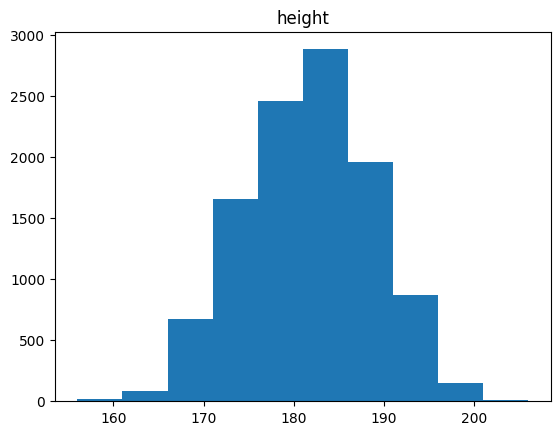

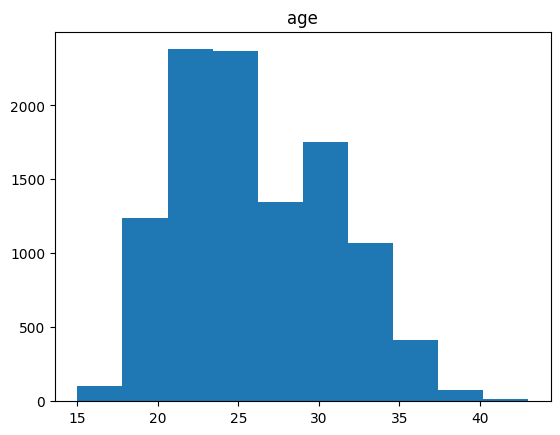

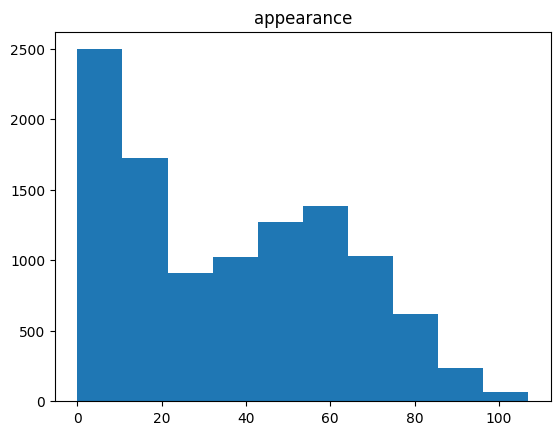

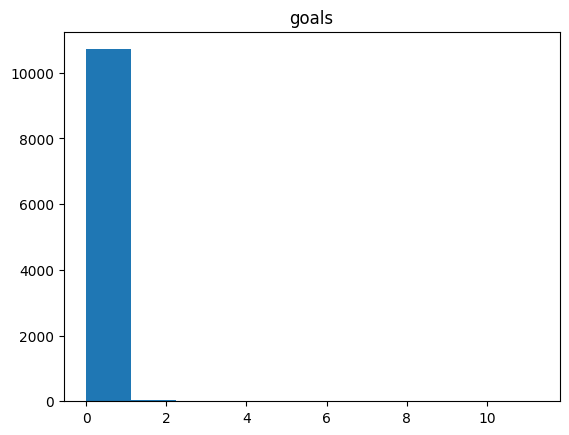

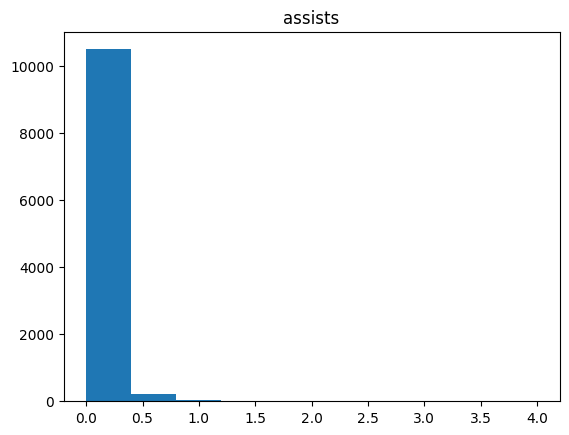

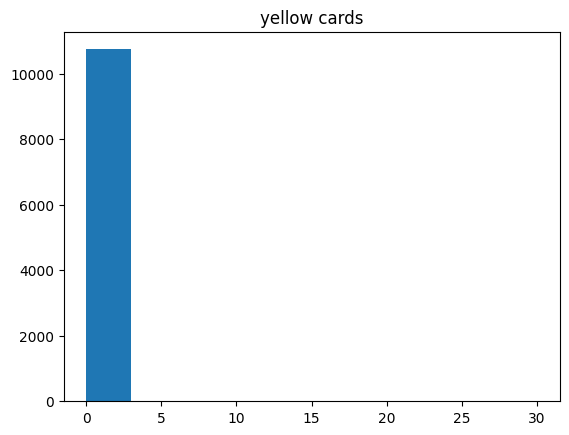

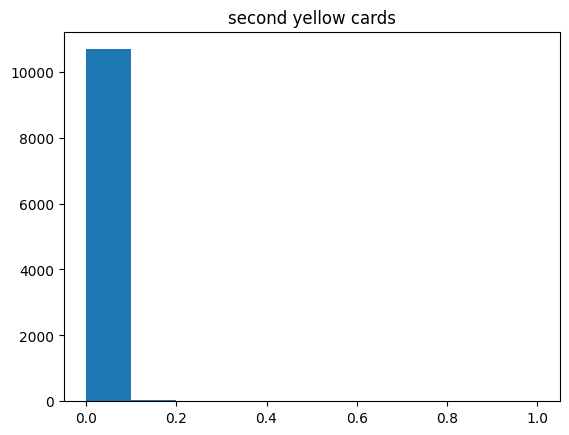

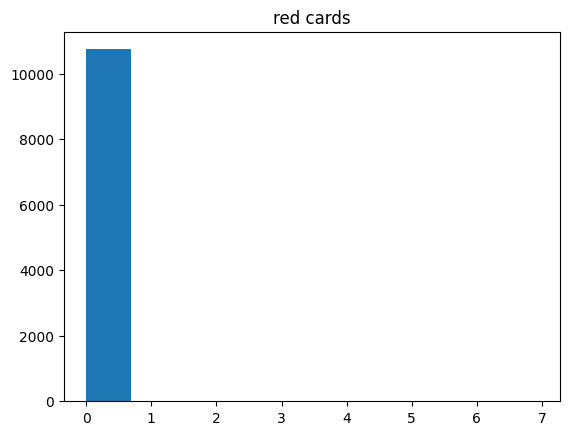

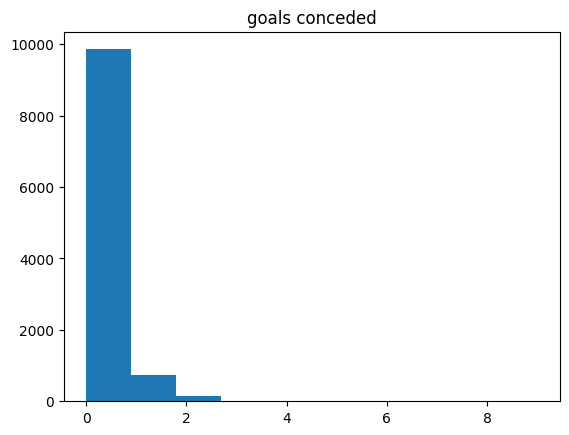

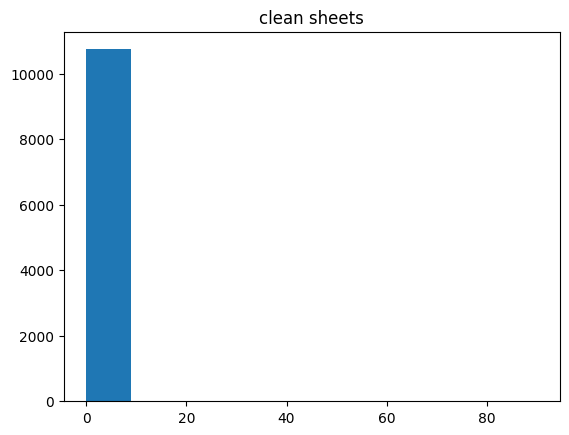

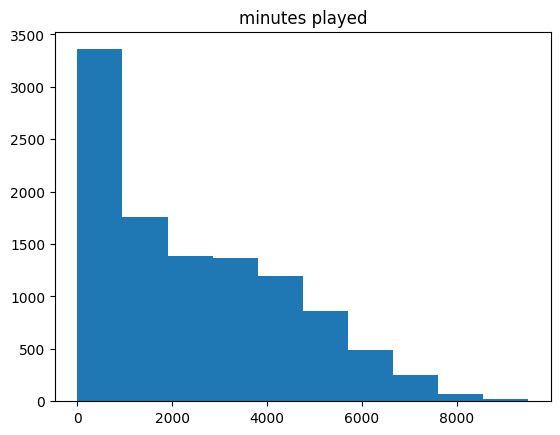

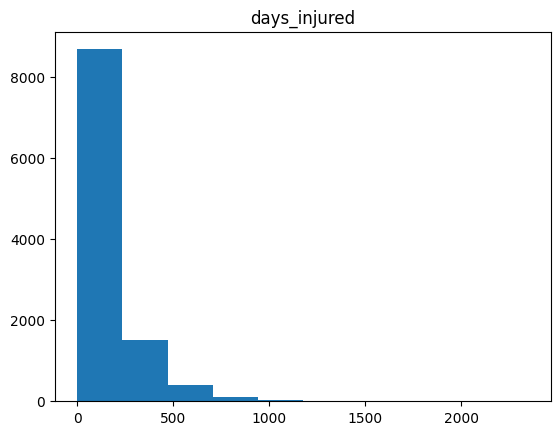

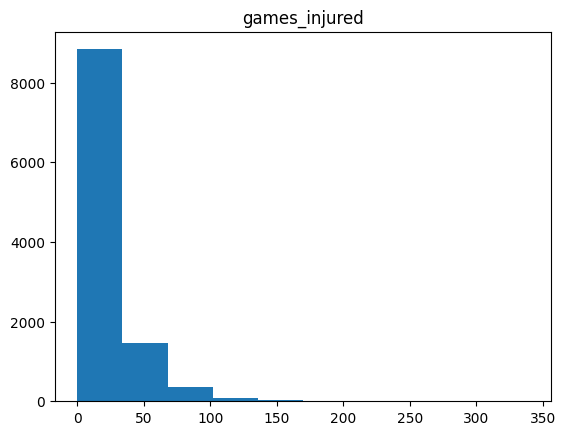

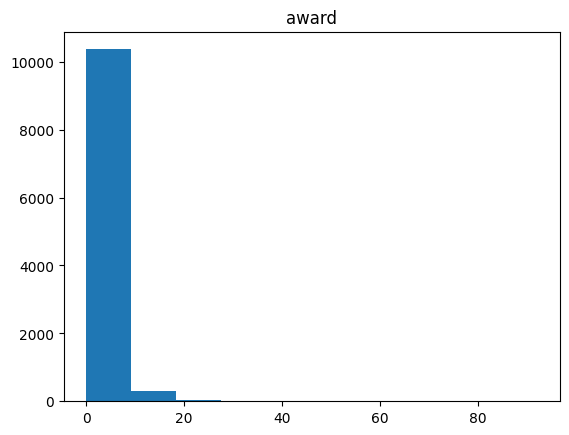

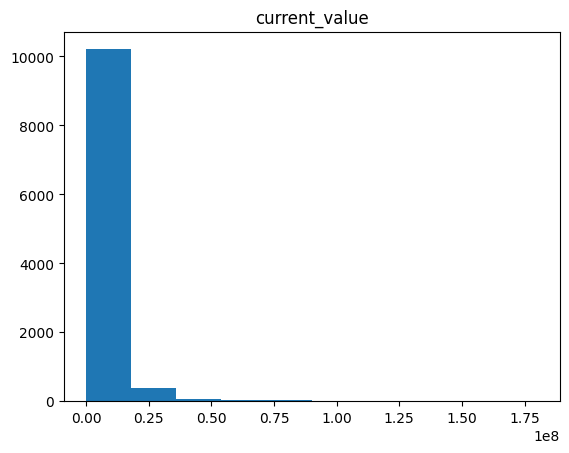

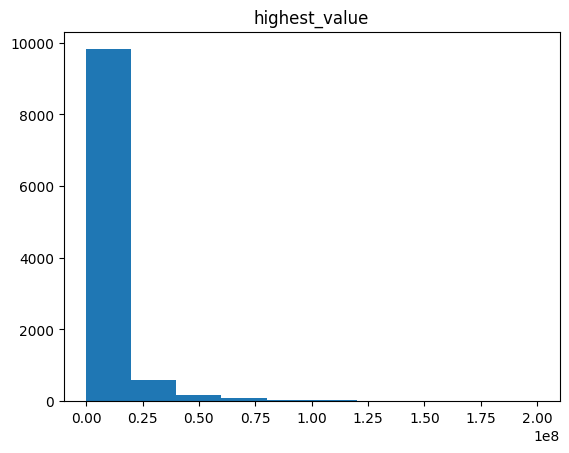

In [ ]:
for i in Num_values:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

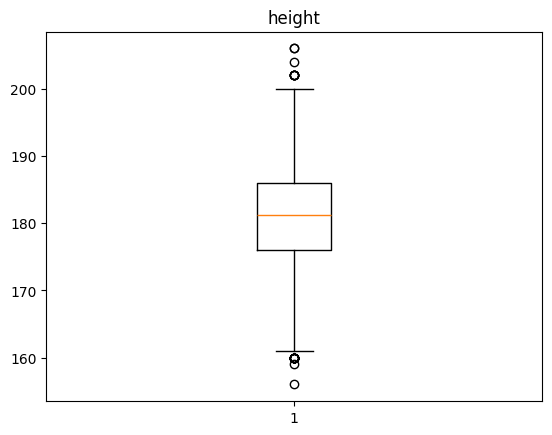

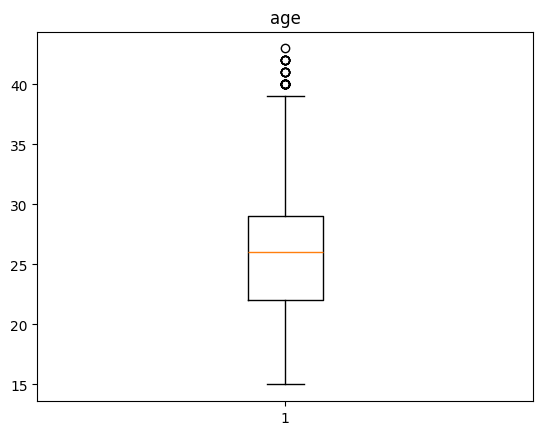

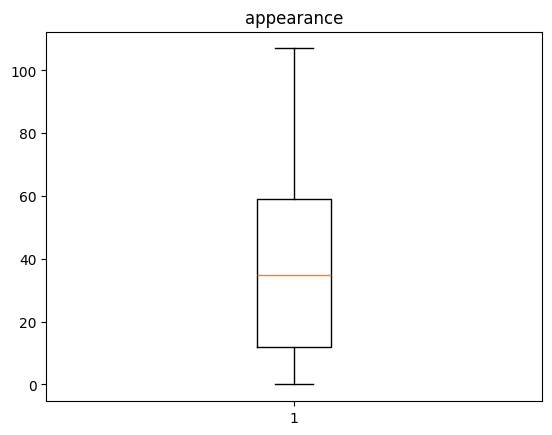

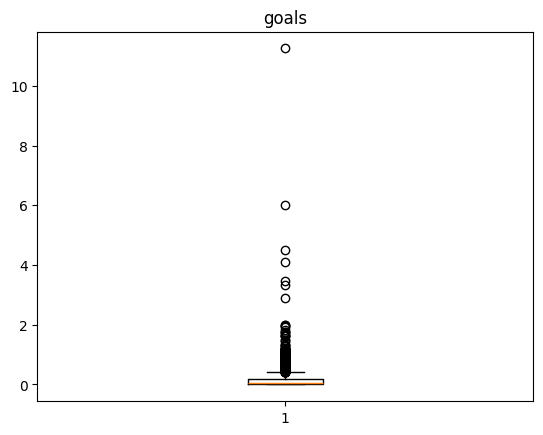

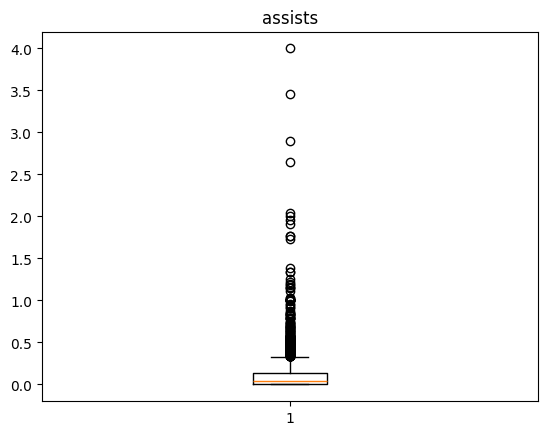

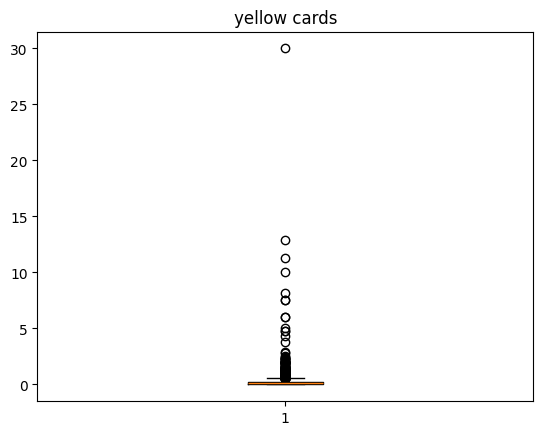

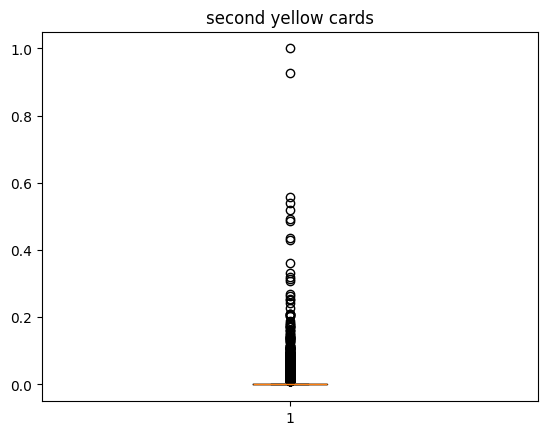

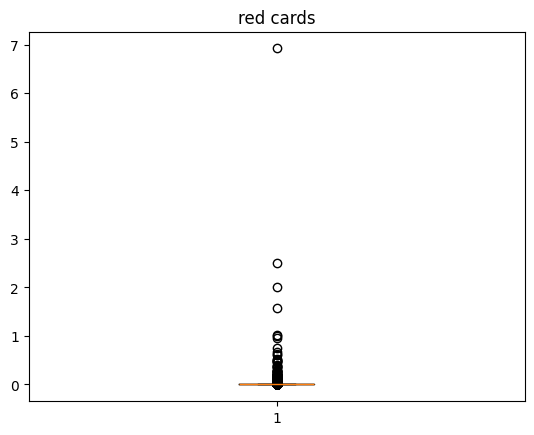

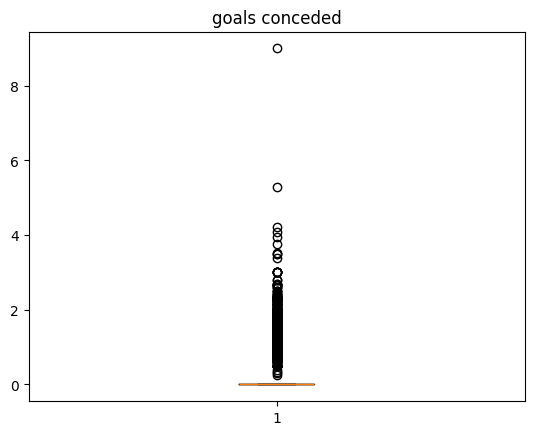

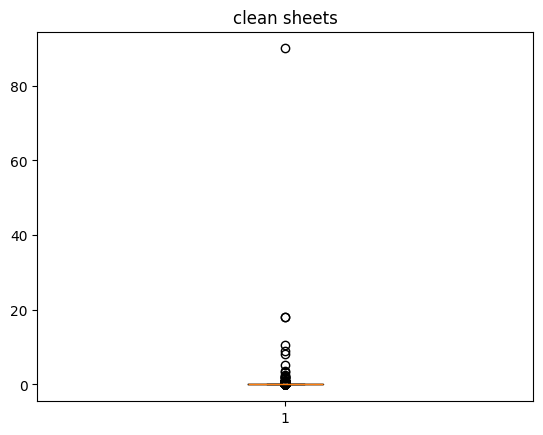

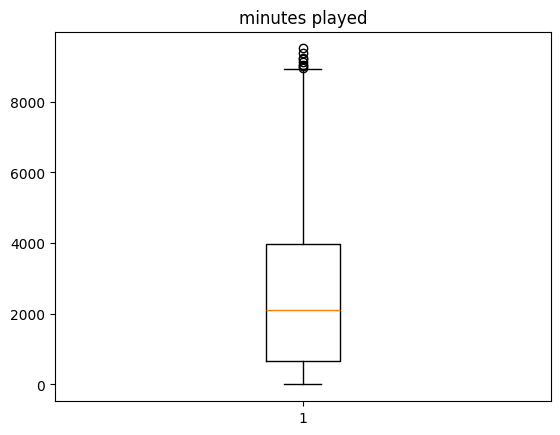

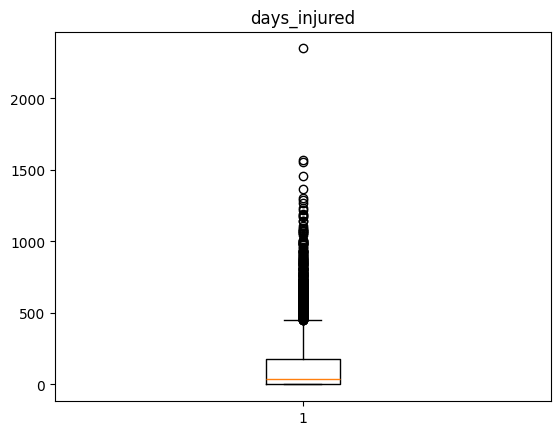

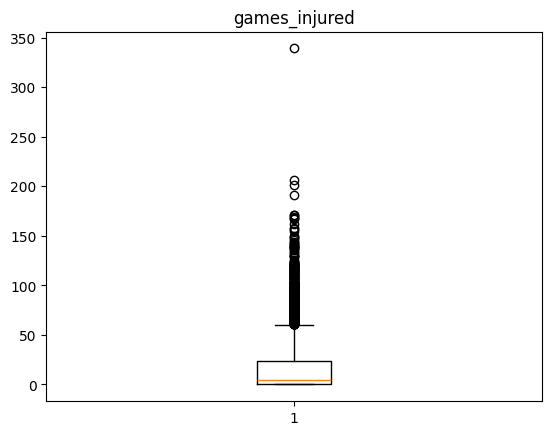

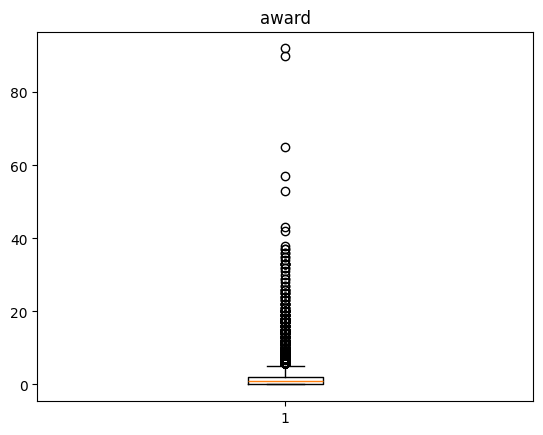

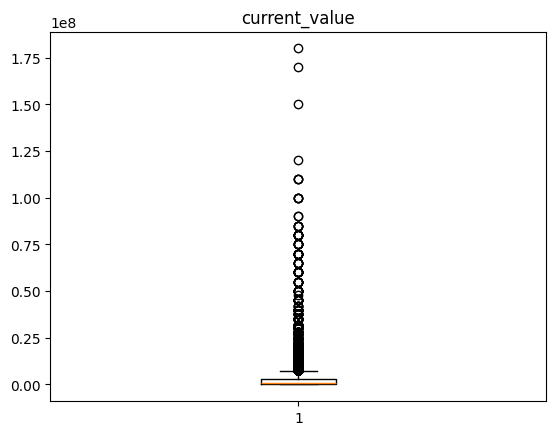

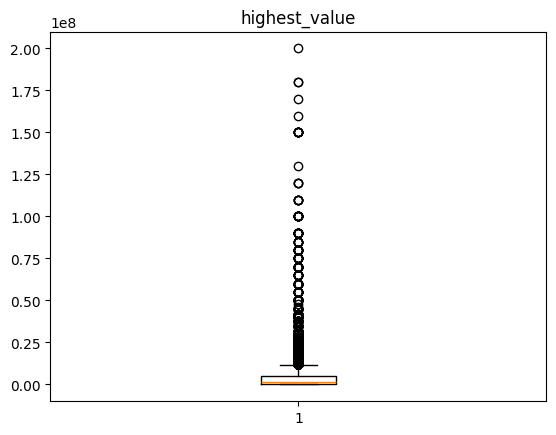

In [ ]:
for i in Num_values :
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

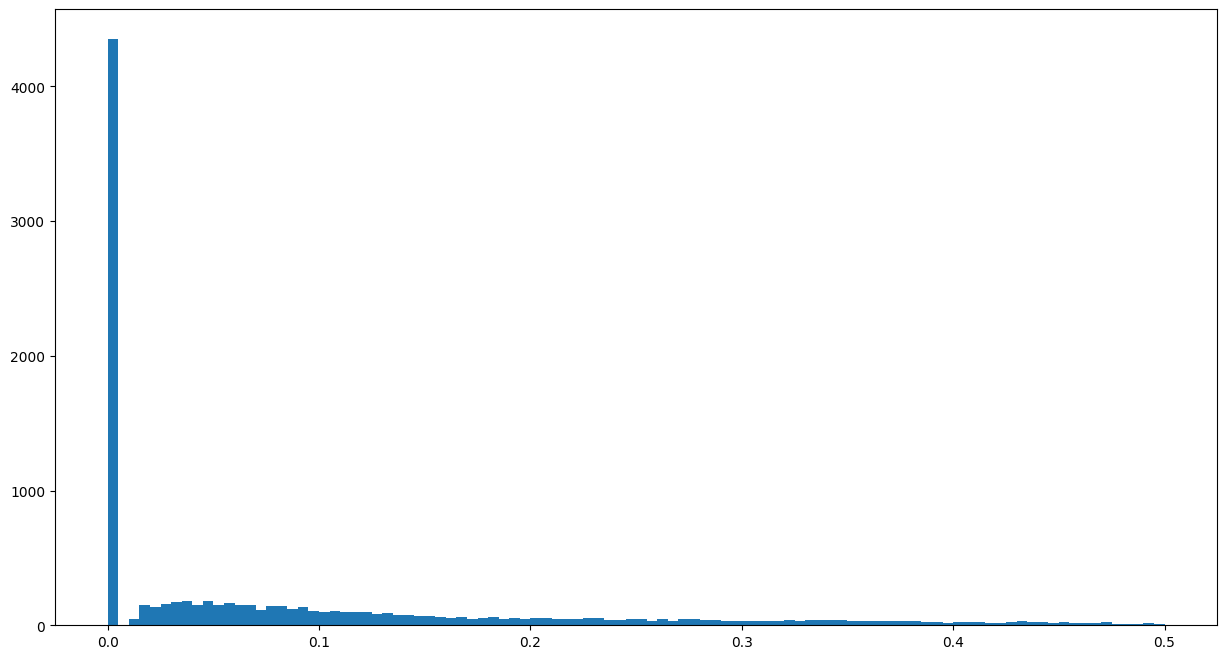

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['goals']<=0.5) & (df['goals']>=0.0)]['goals'], bins=100);
plt.show()

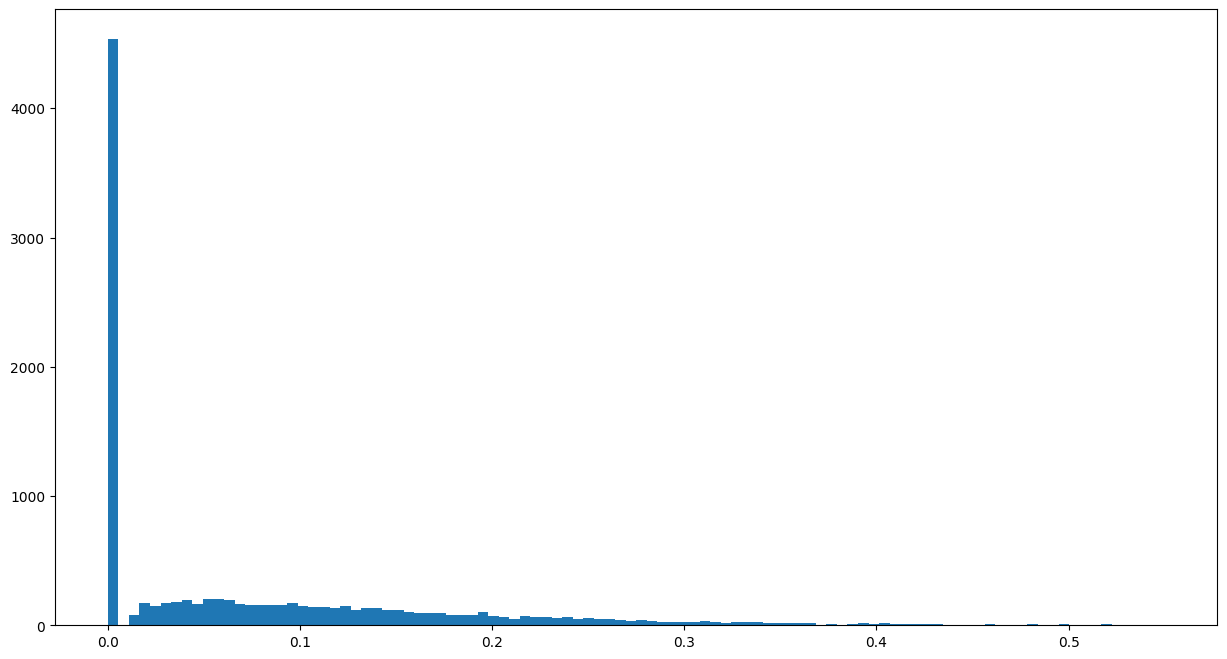

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['assists']<=0.55) & (df['assists']>=0.0)]['assists'], bins=100);
plt.show()

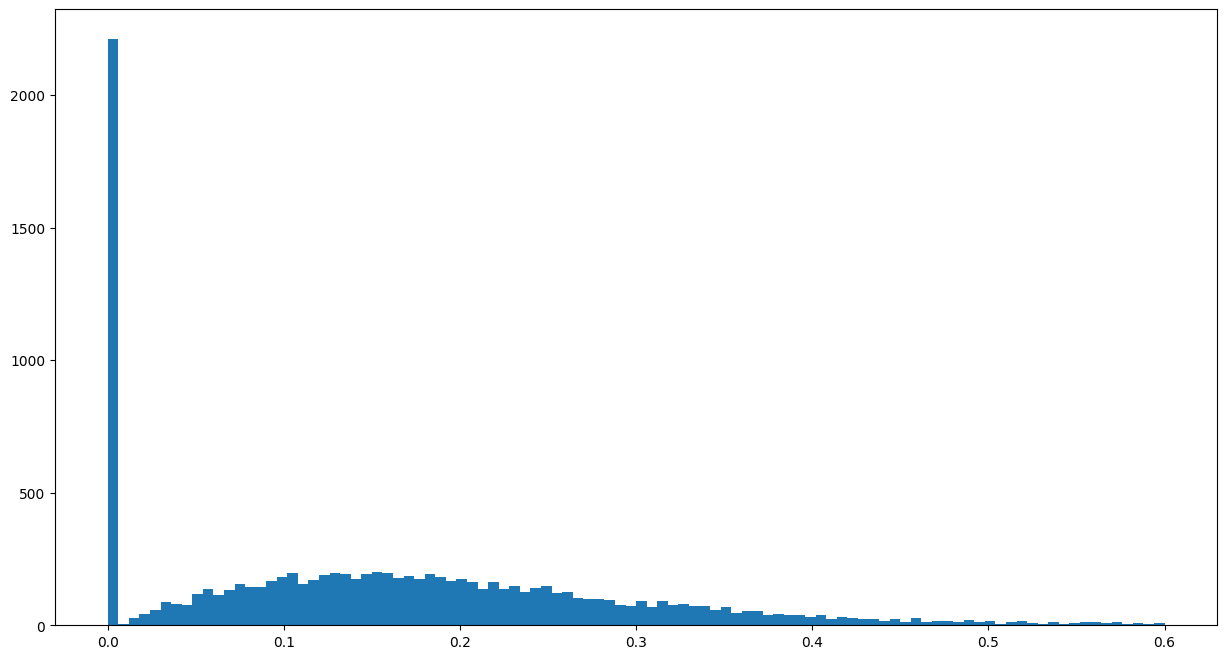

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['yellow cards']<=0.6) & (df['yellow cards']>=0.0)]['yellow cards'], bins=100);
plt.show()

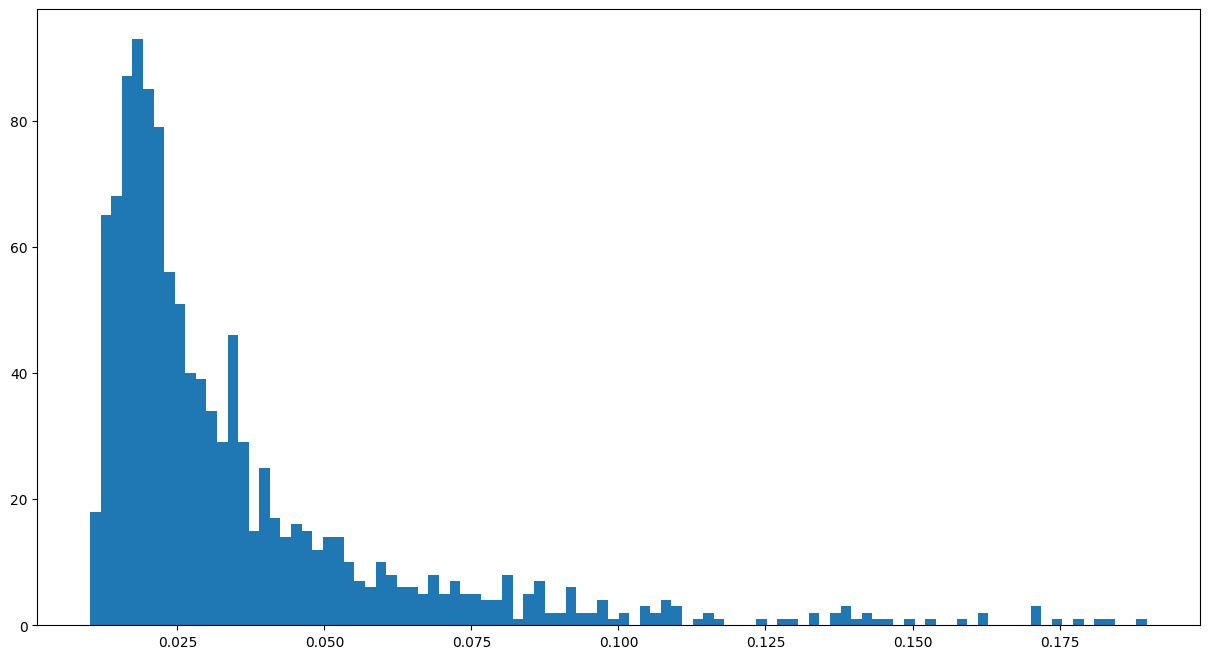

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['second yellow cards']<=0.2) & (df['second yellow cards']>=0.01)]['second yellow cards'], bins=100);
plt.show()

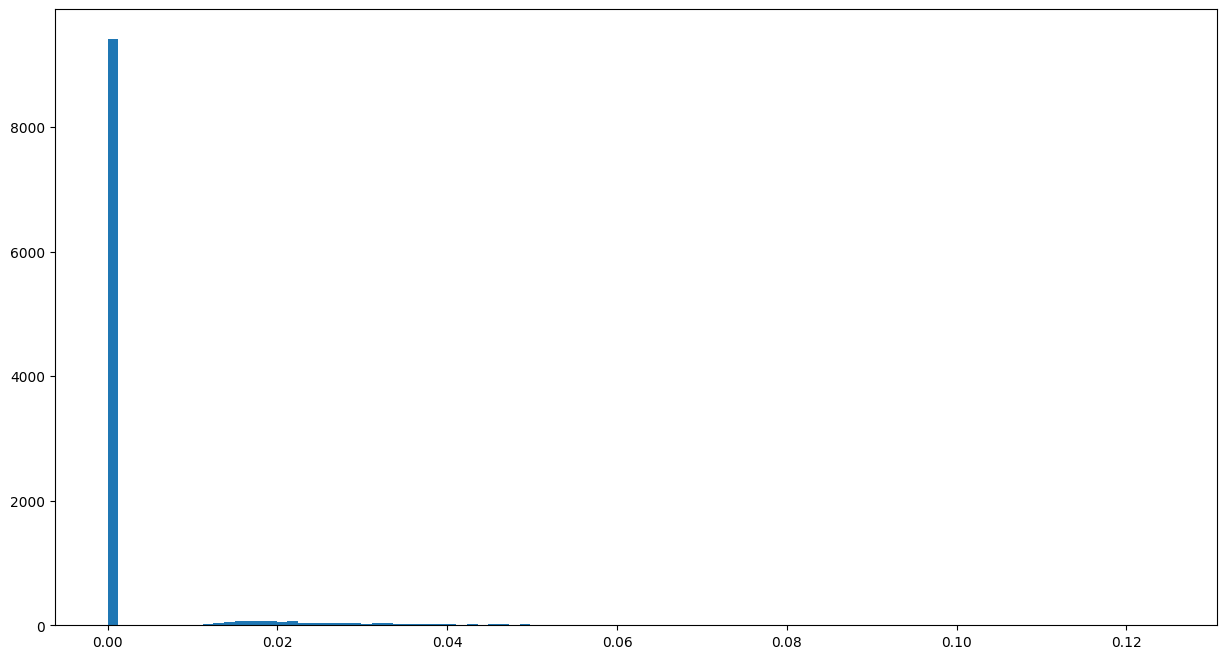

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['red cards']<=0.125) & (df['red cards']>=0.0)]['red cards'], bins=100);
plt.show()

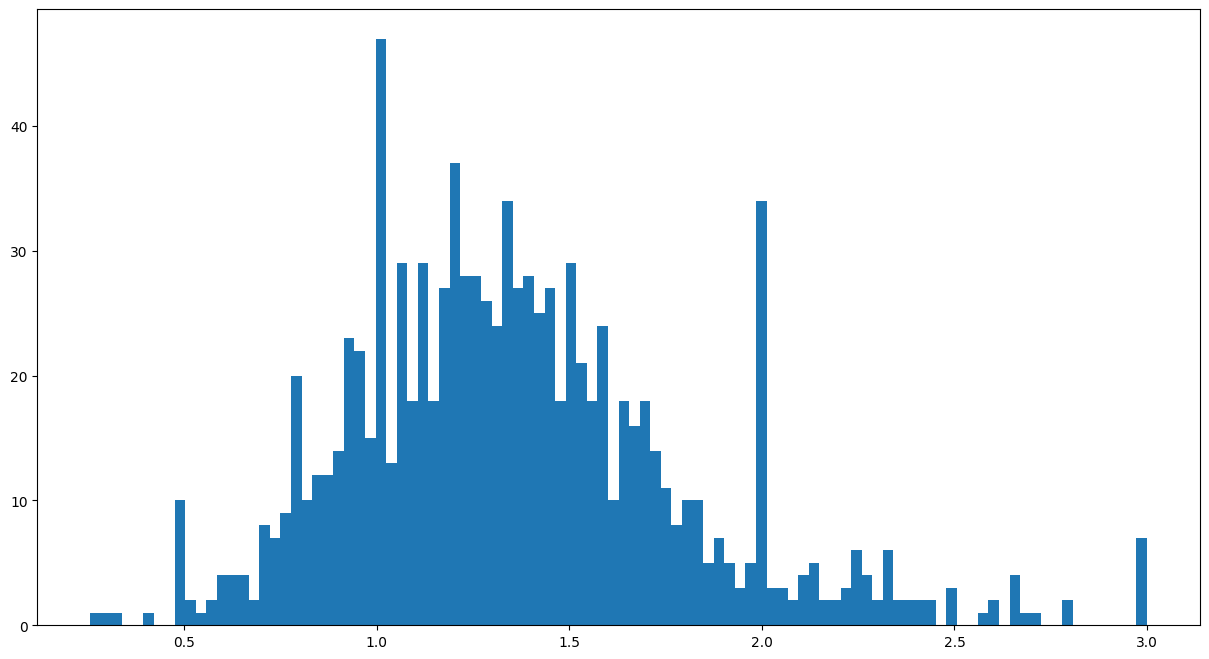

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['goals conceded']<=3) & (df['goals conceded']>=0.01)]['goals conceded'], bins=100);
plt.show()

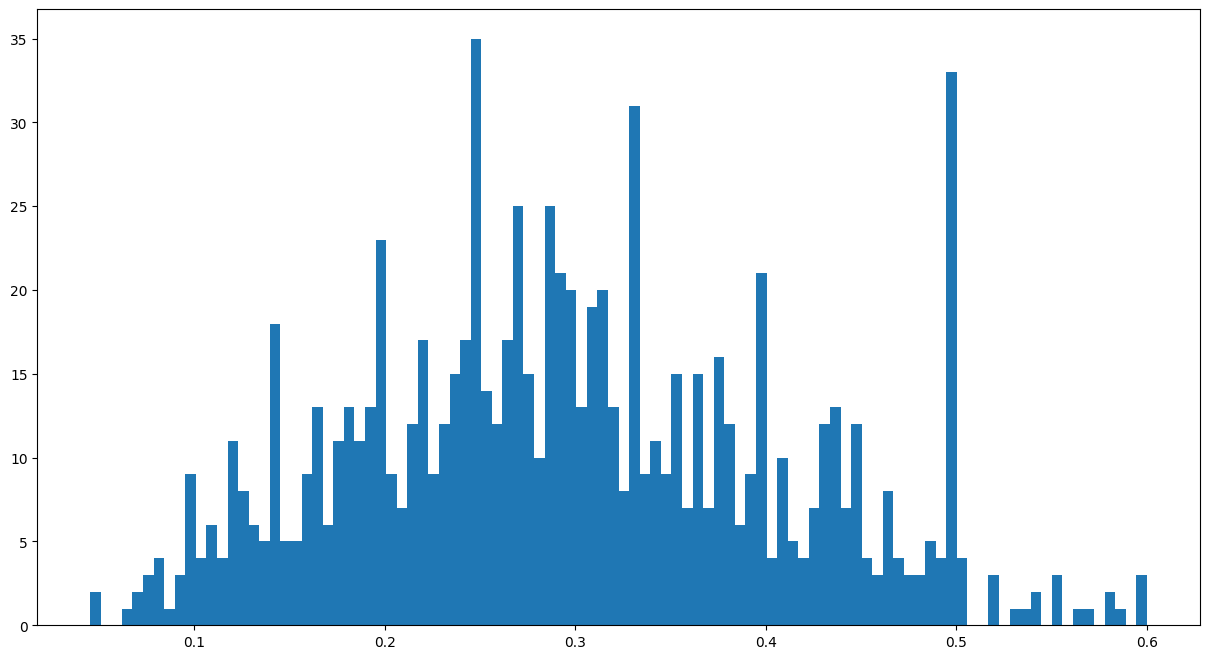

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['clean sheets']<= 0.6) & (df['clean sheets']>=0.01)]['clean sheets'], bins=100);
plt.show()

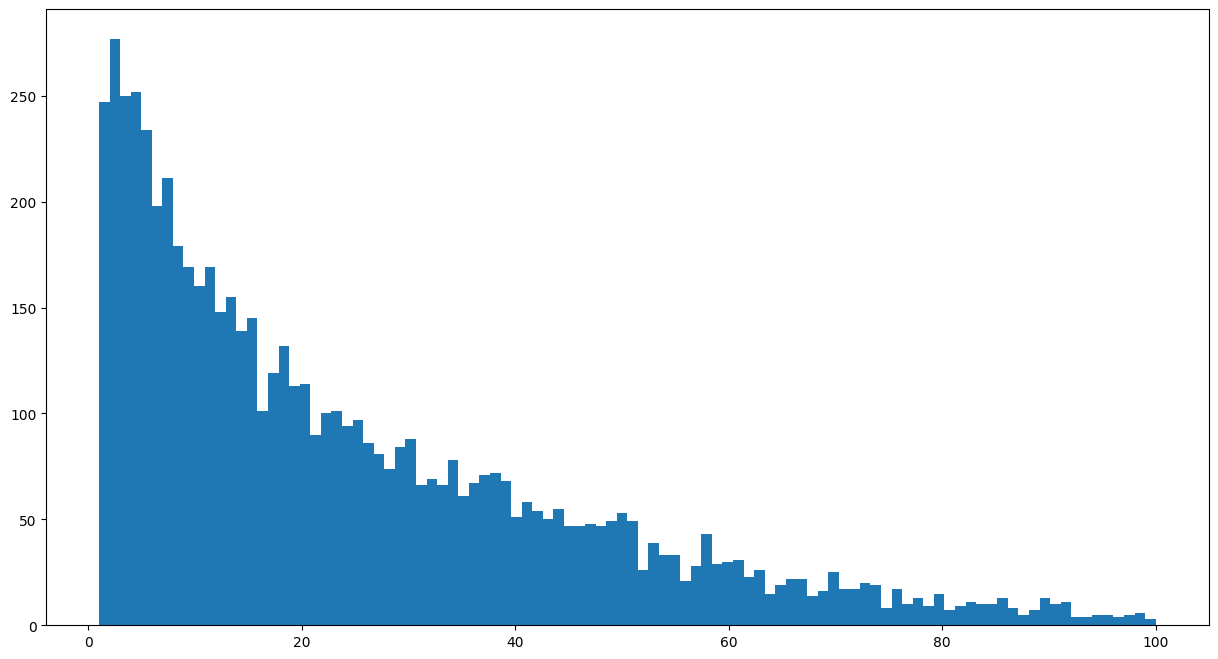

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['games_injured']<= 100) & (df['games_injured']>=0.01)]['games_injured'], bins=100);
plt.show()

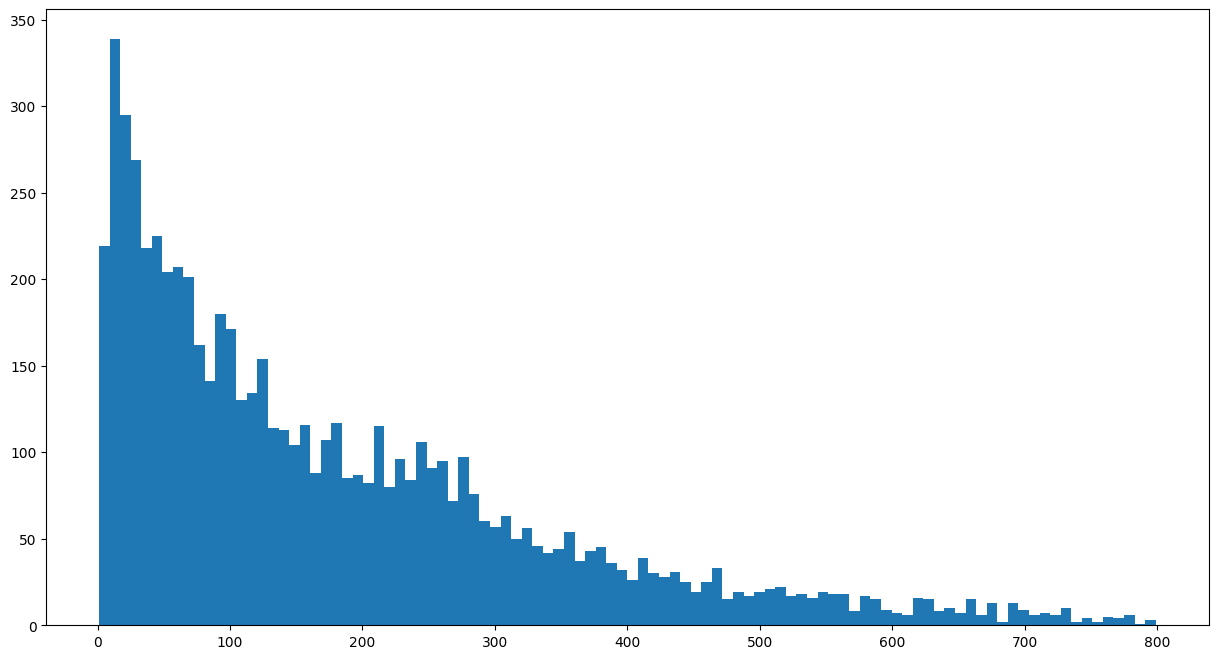

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['days_injured']<= 800) & (df['days_injured']>=0.01)]['days_injured'], bins=100);
plt.show()

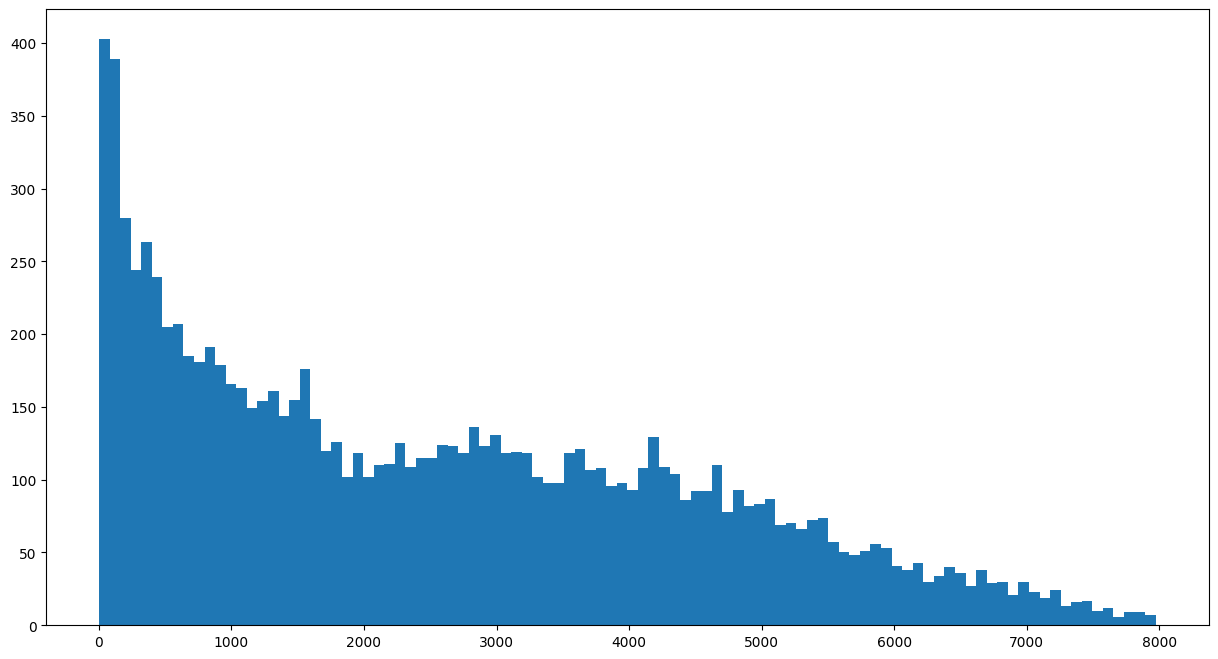

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['minutes played']<=8000) & (df['minutes played']>=0.01)]['minutes played'], bins=100);
plt.show()

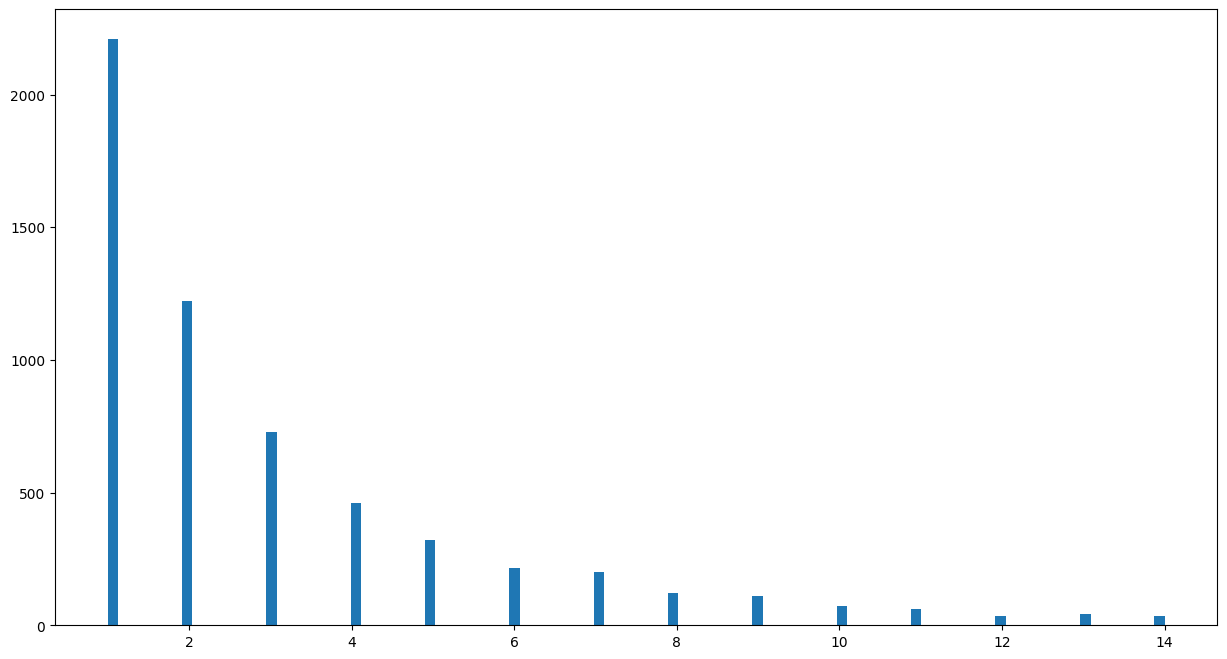

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['award']<= 14) & (df['award']>=0.01)]['award'], bins=100);
plt.show()

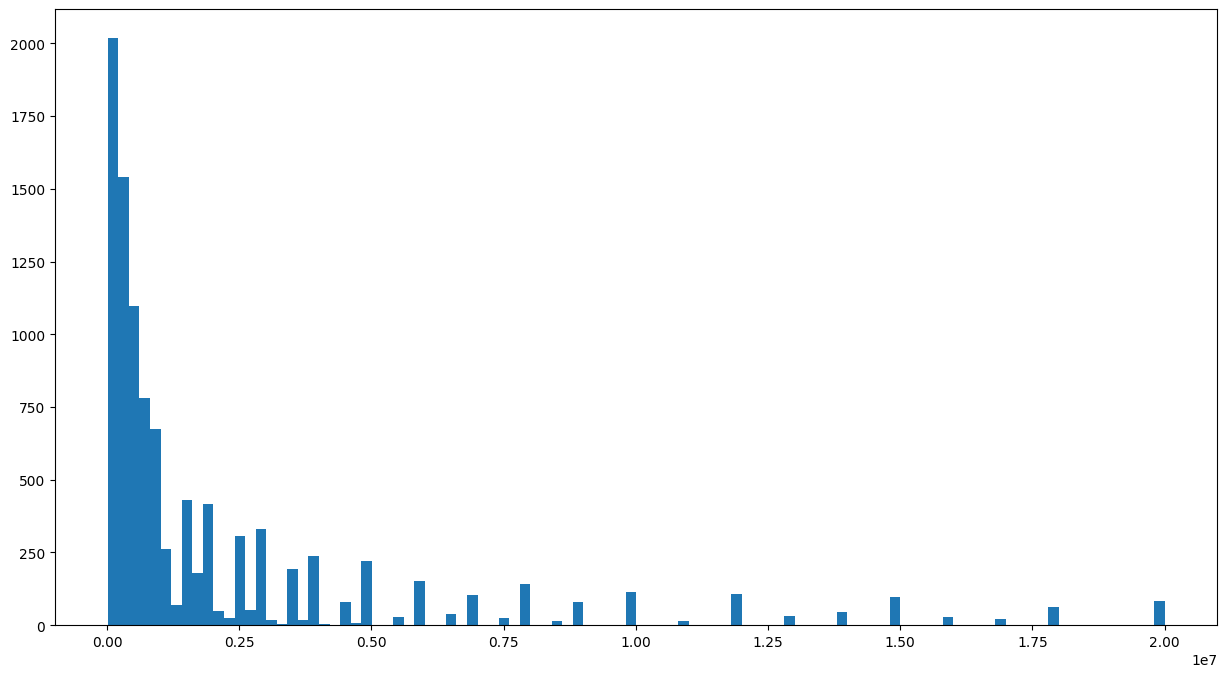

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['current_value']<=20000000) & (df['current_value']>=10000)]['current_value'], bins=100);
plt.show()

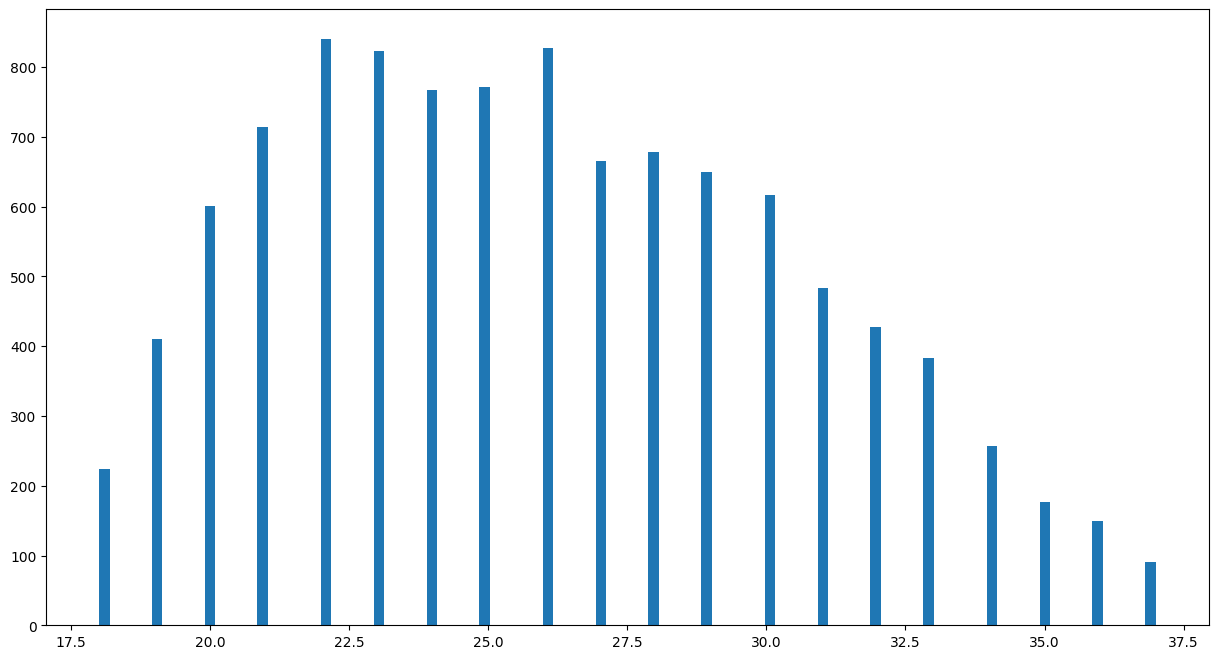

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['age']<=37) & (df['age']>= 18)]['age'], bins=100);
plt.show()

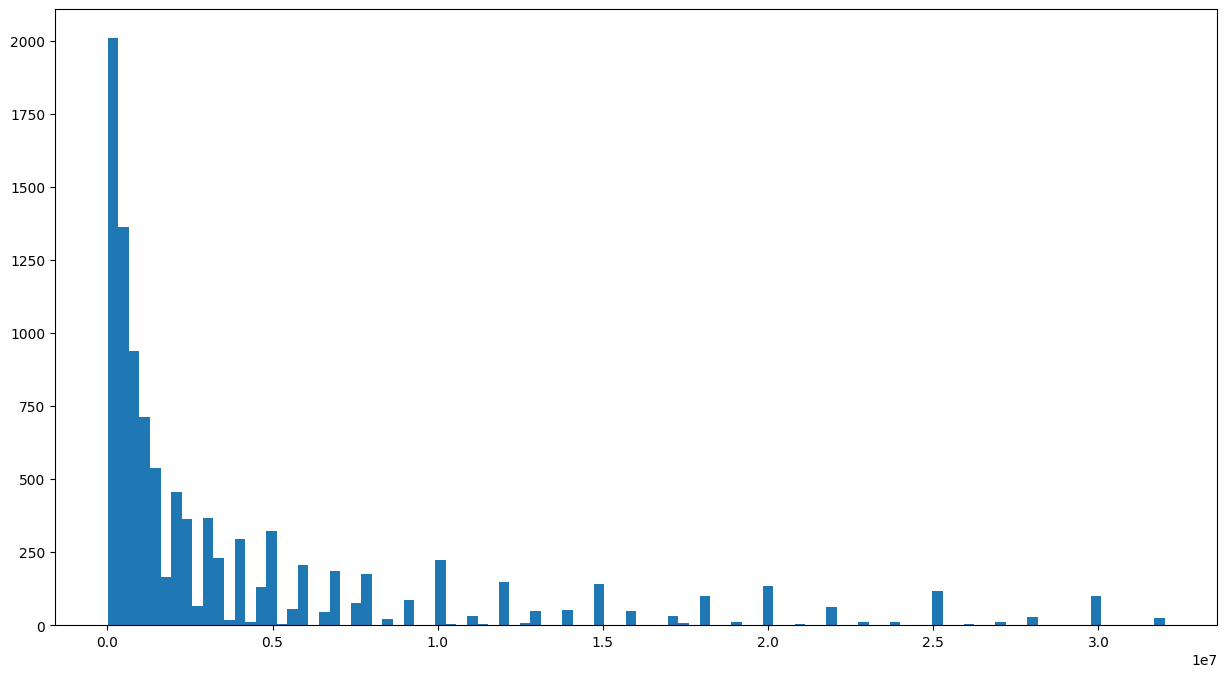

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df[(df['highest_value']<35000000) & (df['highest_value'] >0)]['highest_value'], bins=100);
plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.